## Loading the necessary modules 

In [2]:
import xarray as xr # To create a Dataset
import pickle       # To save the Dataset to memory

In [36]:
from aqua import Reader, catalogue
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", regrid="r200")
import sys
sys.path.insert(0, '../')

# Path to folder, where we want to store the results 
path = '.'

## Initializing the tropical precipitation diagnostic

In [6]:
from src.trop_prec_diagnostic import TR_PR_Diagnostic as TR_PR_Diag
diag = TR_PR_Diag(trop_lat = 10,  num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

## Loading and testing the Week #1

In [37]:
week  = reader.retrieve(streaming=True, stream_step =10,  regrid=True )  # stream_unit = 'weeks',

In [38]:
week

<xarray.Dataset>
Dimensions:    (time: 10, lat: 90, lon: 180, level: 5)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-20 ... 2020-01-20T09:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * level      (level) int64 1 2 3 4 5
Data variables: (12/81)
    100si      (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    100u       (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    100v       (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    10u        (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    10v        (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    2d         (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    ...         ...
    uvb        (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    vike       (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    vipie      (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    vipile     (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    vithe      (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    z          (time, lat, lon) float64 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

#### Counts-histogram of tropical precipitaion

In [39]:
hist_ifs_week = diag.hist1d_fast(week)
tprate_dataset = hist_ifs_week.to_dataset(name="trop_counts")
tprate_dataset.attrs = week.attrs

#### Storing results into memory

In [40]:
with open(str(path)+'ifs_1week_tprate.pickle', 'wb') as output:
    pickle.dump(tprate_dataset, output)

## Week #2

In [52]:
week  = reader.retrieve(streaming=True, stream_step =10, regrid=True )

In [53]:
hist_ifs_week = diag.hist1d_fast(week)
# Creating the Dataset with global attributes
tprate_dataset = hist_ifs_week.to_dataset(name="trop_counts")
tprate_dataset.attrs = week.attrs

In [54]:
with open(str(path)+'ifs_2week_tprate.pickle', 'wb') as output:
    pickle.dump(tprate_dataset, output)

## Week #3

In [55]:
week  = reader.retrieve(streaming=True, stream_step =10,  regrid=True )

In [82]:
hist_ifs_week = diag.hist1d_fast(week)
tprate_dataset = hist_ifs_week.to_dataset(name="trop_counts")
tprate_dataset.attrs = week.attrs

In [83]:
with open(str(path)+'ifs_3week_tprate.pickle', 'wb') as output:
    pickle.dump(tprate_dataset, output)

## Reading and Summing

In [58]:
with open(str(path)+'ifs_1week_tprate.pickle', 'rb') as data:
    dataset_1 = pickle.load(data)
with open(str(path)+'ifs_2week_tprate.pickle', 'rb') as data:
    dataset_2 = pickle.load(data)
with open(str(path)+'ifs_3week_tprate.pickle', 'rb') as data:
    dataset_3 = pickle.load(data)

#### Summing histograms for 3 time-chunks

In [91]:
dataset = dataset_1 + dataset_2 + dataset_3

## Plots

{<Axes: title={'center': 'Tropical prec'}, xlabel='Precipitation, m s**-1', ylabel='Frequency'>,
 <Figure size 640x480 with 1 Axes>}

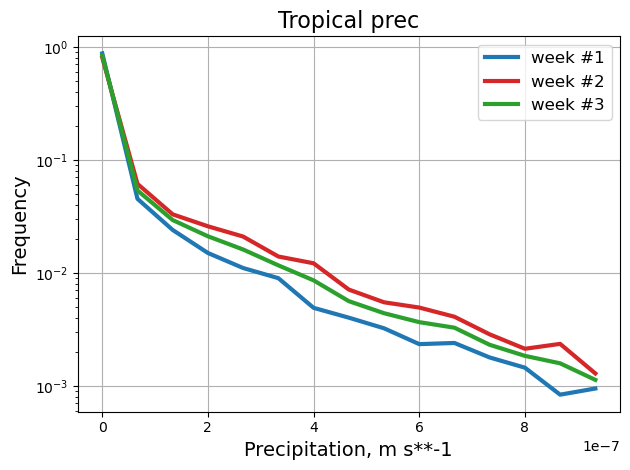

In [90]:
add = diag.hist_figure(dataset_1["trop_counts"], frequency=True,  pdf = False, smooth = True, label='week #1', save=False, plot_title = '')
diag.hist_figure(dataset_2["trop_counts"],  frequency=True,  pdf = False, smooth = True, add = add, color ='tab:red', label='week #2', 
                 save=False, plot_title = '') #"Trop precipitation rate comparison")
diag.hist_figure(dataset_3["trop_counts"],  frequency=True,  pdf = False, smooth = True, add = add, color ='tab:green', label='week #3', 
                 save=False, plot_title='Tropical prec')
